In [24]:
# import library
import pandas as pd
from feature_engine.encoding import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, classification_report


In [3]:
data = pd.read_csv('../Data/data_preproce.csv')

In [4]:
data.head()

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,Charcoal Fabric,Music,1


In [ ]:
y = data.feedback

---
## Preprocesado
---

In [16]:
one_enc = OneHotEncoder(variables=['variation'],drop_last=True) # k-1
data_enc = one_enc.fit_transform(data)

In [18]:
data_enc.drop(columns='feedback',inplace=True)
data_enc.head()

,verified_reviews,variation_Charcoal Fabric,variation_Walnut Finish,variation_Heather Gray Fabric,variation_Sandstone Fabric,variation_Oak Finish,variation_Black,variation_White,variation_Black Spot,variation_White Spot,variation_Black Show,variation_White Show,variation_Black Plus,variation_White Plus,variation_Configuration: Fire TV Stick,variation_Black Dot
0,Love my Echo!,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Loved it!,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"Sometimes while playing a game, you can answer...",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Music,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
import re
from nltk.corpus import stopwords
import nltk
from nltk.stem.porter import PorterStemmer

In [10]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/andres/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
len(stopwords.words('english'))

179

In [7]:
def clear_words(frase):
  review = re.sub('[^a-zA-Z]', ' ', frase)
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if  word not in set(all_stopwords)]
  review = ' '.join(review)
  return review

In [8]:
char = data_enc['verified_reviews'].apply(clear_words)

In [9]:
# vectorización de palabras
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(char)

In [11]:
vectorizer.get_feature_names_out()[:10]

array(['abay', 'abc', 'abd', 'abil', 'abl', 'abod', 'absolut',
       'absolutli', 'ac', 'accent'], dtype=object)

In [12]:
x.toarray().shape

(3149, 2766)

In [19]:
data_enc.drop(columns='verified_reviews',inplace=True)
df_temp = pd.DataFrame(x.toarray())
data_enc = pd.concat([data_enc,df_temp],ignore_index=True,axis=1)
data_enc.head()

,0,1,2,3,4,5,6,7,8,9,...,2771,2772,2773,2774,2775,2776,2777,2778,2779,2780
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


---
## Train Test set
---

In [22]:
x_train,x_test,y_train,y_test = train_test_split(data_enc,y,test_size=0.2,random_state=21,stratify=y)
x_train.shape,x_test.shape

((2519, 2781), (630, 2781))

---
# **Modelo Naive Bayes**

---

In [23]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(x_train,y_train)

MultinomialNB()

In [26]:
predict = classifier.predict(x_train)

              precision    recall  f1-score   support

           0       0.86      0.57      0.69       205
           1       0.96      0.99      0.98      2314

    accuracy                           0.96      2519
   macro avg       0.91      0.78      0.83      2519
weighted avg       0.95      0.96      0.95      2519



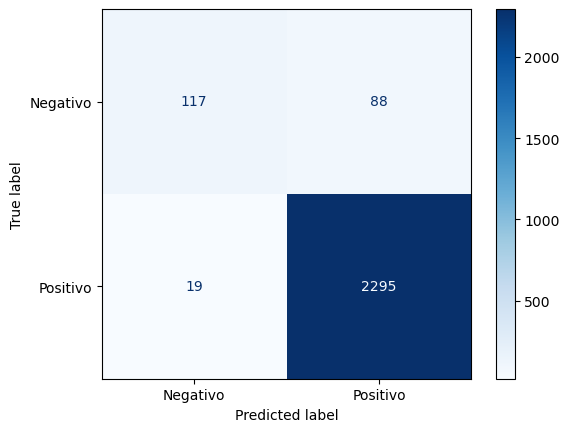

In [29]:
print(classification_report(y_train,predict))
disp = ConfusionMatrixDisplay.from_estimator(
    classifier,
    x_train,
    y_train,
    display_labels=['Negativo', 'Positivo'],
    cmap=plt.cm.Blues,
)

              precision    recall  f1-score   support

           0       0.55      0.33      0.41        51
           1       0.94      0.98      0.96       579

    accuracy                           0.92       630
   macro avg       0.75      0.65      0.69       630
weighted avg       0.91      0.92      0.92       630



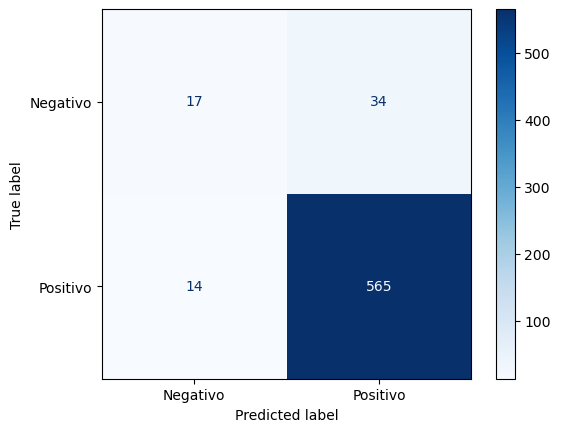

In [31]:
predict = classifier.predict(x_test)
print(classification_report(y_test,predict))
disp = ConfusionMatrixDisplay.from_estimator(
    classifier,
    x_test,
    y_test,
    display_labels=['Negativo', 'Positivo'],
    cmap=plt.cm.Blues,
)